In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def calculate_average_ranking_score(post_ids, results_file, pairs_file, k_val):
    """
    Calculates the average ranking score for a list of post IDs using pre-computed results.

    Args:
      post_ids (list): List of post IDs to evaluate.
      results_file (str): Path to the CSV file containing the pre-computed results (predicted).
      pairs_file (str): Path to the CSV file containing the true pairings.
      k_val (int) : k value for computing success@k

    Returns:
      float: The average ranking score for the given posts, or 0 if no valid posts are found.
    """

    results_df = results_file
    # pairs_df = pd.read_csv(pairs_file)
    pairs_df = pairs_file
    all_post_scores = []
    all_post_success_k = []

    for post_id in post_ids:

        # Get true pairs for this post_id from pairs.csv
        true_pairs = pairs_df[pairs_df['post_id'] == post_id]
        correct_fact_ids = true_pairs[true_pairs['post_id'] == post_id]['fact_check_id'].tolist()

        # Get predicted top k results for this post from results_df
        top_results = results_df[results_df['post_id'] == post_id].sort_values(by="similarity", ascending=False).head(k_val)


        post_score = 0
        if not top_results.empty:
            for correct_fact_id in correct_fact_ids:
                ranks = list(top_results[top_results['fact_check_id'] == correct_fact_id].index)
                if ranks:
                    rank = ranks[0] + 1
                    post_score += 1 / rank
            if correct_fact_ids:
                post_score /= len(correct_fact_ids)

        success_at_k = 0
        if not top_results.empty:
            for correct_fact_id in correct_fact_ids:
                if correct_fact_id in top_results['fact_check_id'].values:
                    success_at_k += 1
            if correct_fact_ids:
                success_at_k /= len(correct_fact_ids)

        all_post_scores.append(post_score)
        all_post_success_k.append(success_at_k)

    average_score = np.mean(all_post_scores) if all_post_scores else 0
    average_success_k = np.mean(all_post_success_k) if all_post_success_k else 0
    return average_score, average_success_k

In [4]:
char_counts = pd.read_csv('drive/MyDrive/Sem_Sim_proj/count_cat.csv')
true_pairs = pd.read_csv('drive/MyDrive/Sem_Sim_proj/pairs.csv')
result_df_bert = pd.read_csv('drive/MyDrive/Sem_Sim_proj/sen_bert_k100.csv')
result_df_BM = pd.read_csv('drive/MyDrive/Sem_Sim_proj/BM25_results.csv')

In [ ]:
range_list = []
col_list = []
range_dict = dict()
col_list2 = []

for col in char_counts.columns:
    i_range = char_counts[col][0]
    range_list.append(i_range)
    col_list.append(col)

x = ast.literal_eval(i_range)
l = len(range_list)

for i in range(1, l):
    range_list[i] = ast.literal_eval(range_list[i])
    range_dict[col_list[i]] = range_list[i]
    col_list2.append(col_list[i])

In [ ]:
score, success_k = calculate_average_ranking_score(x, result_df_bert, true_pairs, 10)
print("Average ranking score:", score)
print("Average success@k:", success_k)

Average ranking score: 5.131368997114363e-07
Average success@k: 0.4584527220630373


In [ ]:
score_list_bert = []
success_k_list_bert = []

for col in col_list2:
    i_range = range_dict[col]
    score, success_k = calculate_average_ranking_score(i_range, result_df_bert, true_pairs, 10)
    score_list_bert.append(score)
    success_k_list_bert.append(success_k)


In [ ]:
score_list_BM = []
success_k_list_BM = []

for col in col_list2:
    i_range = range_dict[col]
    score, success_k = calculate_average_ranking_score(i_range, result_df_BM, true_pairs, 10)
    score_list_BM.append(score)
    success_k_list_BM.append(success_k)

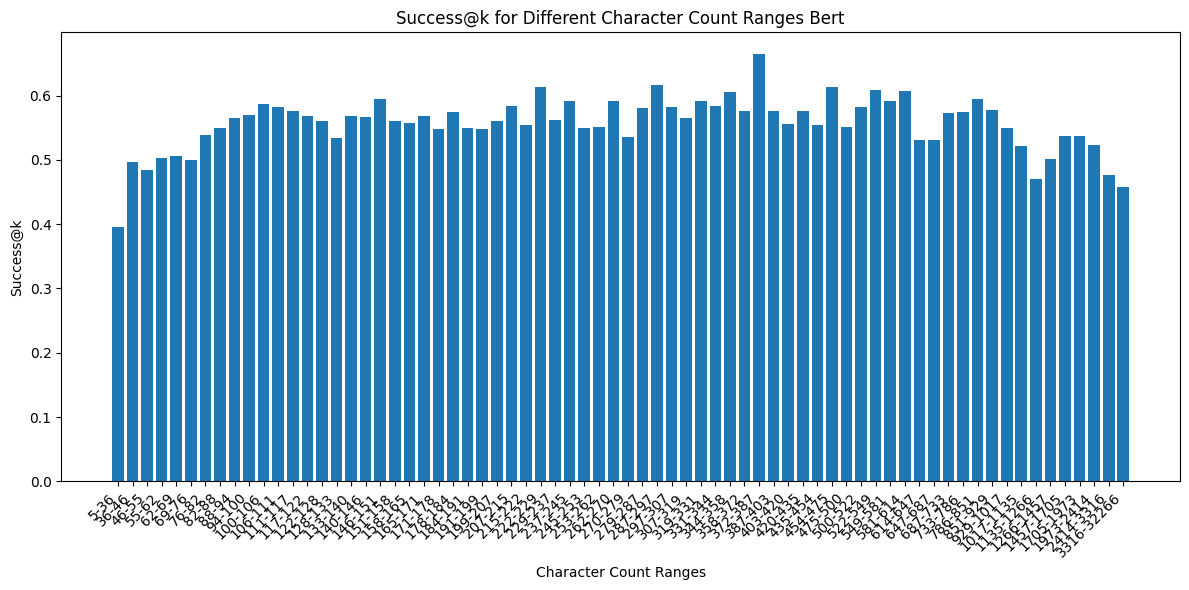

In [ ]:
# prompt: plot a bar chart with the x labels coming from col_list and the y coming from success_k_list

plt.figure(figsize=(12, 6))
plt.bar(col_list2, success_k_list_bert)
plt.xlabel("Character Count Ranges")
plt.ylabel("Success@k")
plt.title("Success@k for Different Character Count Ranges Bert")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

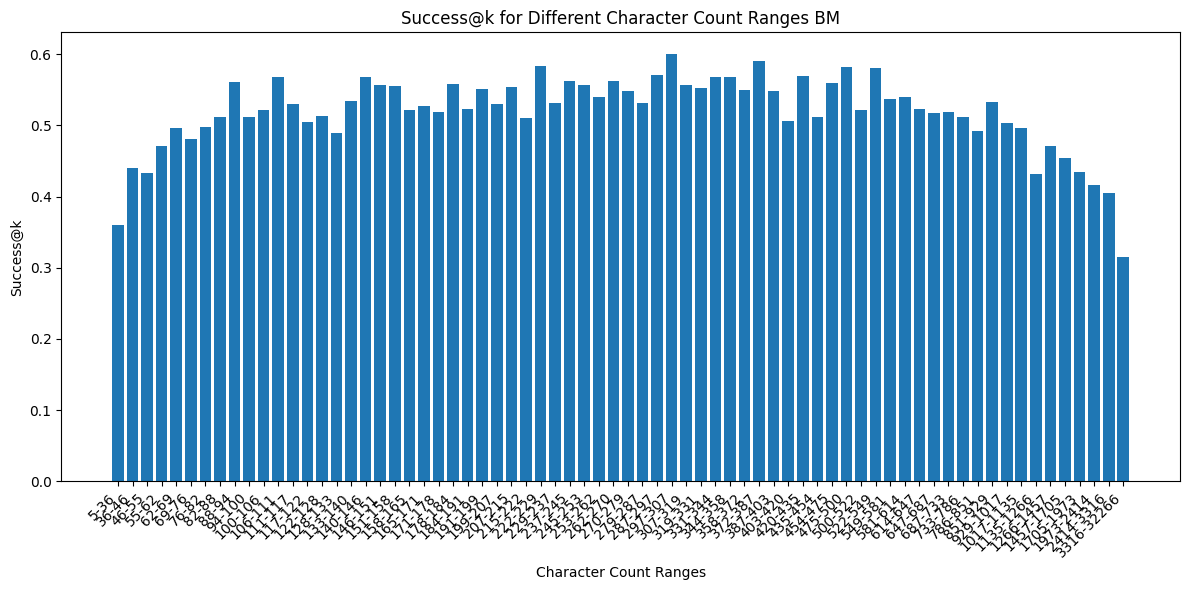

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(col_list2, success_k_list_BM)
plt.xlabel("Character Count Ranges")
plt.ylabel("Success@k")
plt.title("Success@k for Different Character Count Ranges BM")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

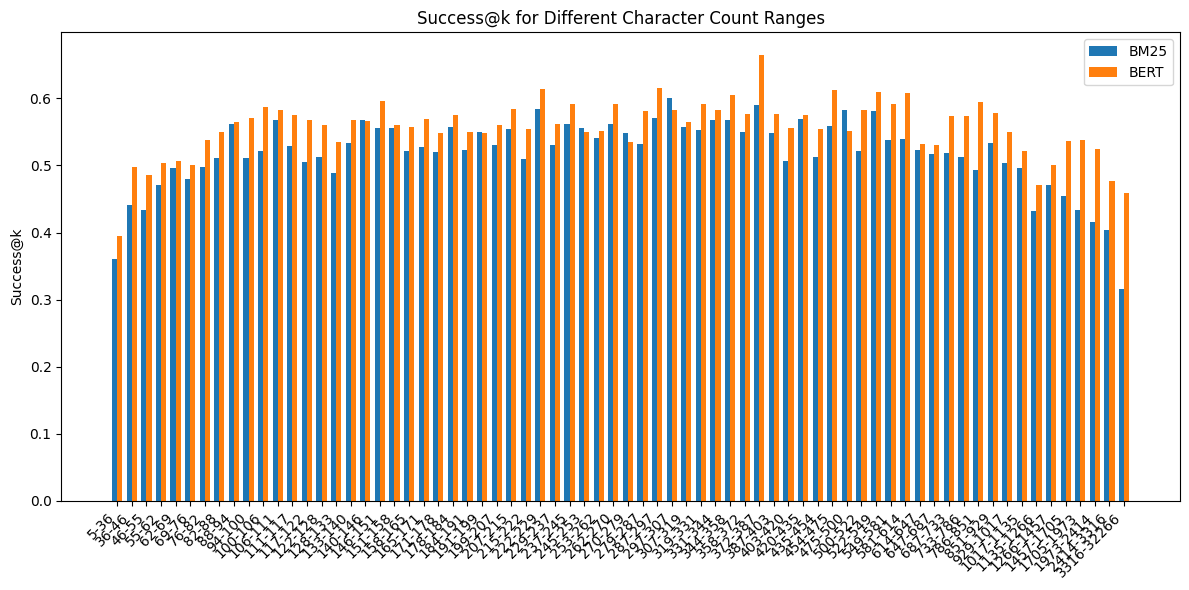

In [ ]:
# prompt: plot a bar chart where the x labels are in col_list and there are two different sets of lists for y which are success_k_list_BM and success_k_list_bert

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
width = 0.35  # the width of the bars
x = np.arange(len(col_list2))  # the label locations
rects1 = plt.bar(x - width/2, success_k_list_BM, width, label='BM25')
rects2 = plt.bar(x + width/2, success_k_list_bert, width, label='BERT')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Success@k')
plt.title('Success@k for Different Character Count Ranges')
plt.xticks(x, col_list2, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

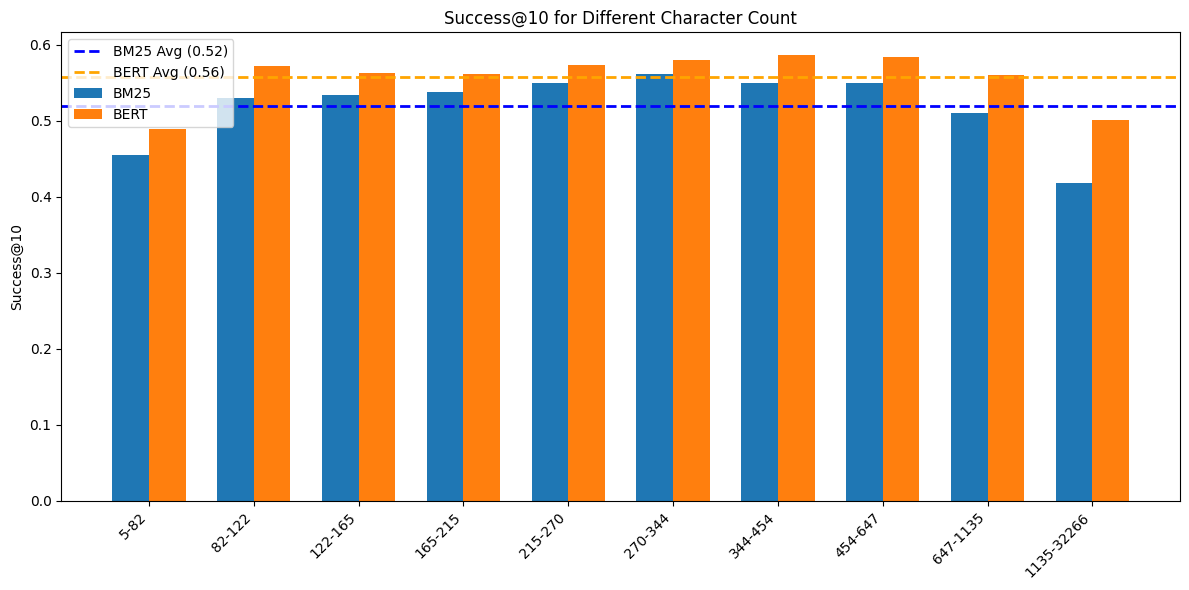

In [7]:
char_counts = pd.read_csv('drive/MyDrive/Sem_Sim_proj/count_cat_10.csv')
range_list = []
col_list = []
range_dict = dict()
col_list2 = []

for col in char_counts.columns:
    i_range = char_counts[col][0]
    range_list.append(i_range)
    col_list.append(col)

x = ast.literal_eval(i_range)
l = len(range_list)

for i in range(1, l):
    range_list[i] = ast.literal_eval(range_list[i])
    range_dict[col_list[i]] = range_list[i]
    col_list2.append(col_list[i])



score_list_bert = []
success_k_list_bert = []

for col in col_list2:
    i_range = range_dict[col]
    score, success_k = calculate_average_ranking_score(i_range, result_df_bert, true_pairs, 10)
    score_list_bert.append(score)
    success_k_list_bert.append(success_k)

avg_success_bert = np.mean(success_k_list_bert)


score_list_BM = []
success_k_list_BM = []

for col in col_list2:
    i_range = range_dict[col]
    score, success_k = calculate_average_ranking_score(i_range, result_df_BM, true_pairs, 10)
    score_list_BM.append(score)
    success_k_list_BM.append(success_k)

avg_success_BM = np.mean(success_k_list_BM)



plt.figure(figsize=(12, 6))
width = 0.35  # the width of the bars
x = np.arange(len(col_list2))  # the label locations
rects1 = plt.bar(x - width/2, success_k_list_BM, width, label='BM25')
rects2 = plt.bar(x + width/2, success_k_list_bert, width, label='BERT')

plt.axhline(y=avg_success_BM, color='blue', linestyle='--', linewidth=2, label=f'BM25 Avg ({avg_success_BM:.2f})')
plt.axhline(y=avg_success_bert, color='orange', linestyle='--', linewidth=2, label=f'BERT Avg ({avg_success_bert:.2f})')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Success@10')
plt.title('Success@10 for Different Character Count')
plt.xticks(x, col_list2, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import ast

def calculate_ground_truth_metrics(post_ids, results_file, k_val):
    """
    Calculates metrics related to the ground truth data.

    Args:
        post_ids (list): List of post IDs to evaluate.
        results_file (str): Path to the CSV file containing the pre-computed results.
        k_val (int): The k-value to consider for success@k and top-k analysis.

    Returns:
        tuple: (avg_ranking_score, avg_success_k, true_rank_distribution,
         not_in_top_100_counts, top_k_frequencies, true_score_distribution)
    """

    results_df = pd.read_csv(results_file)
    all_post_scores = []
    all_post_success_k = []
    all_true_ranks = []
    not_in_top_100_counts = 0
    top_k_frequencies = {'1-10': 0, '11-20': 0, '21-50': 0, '51-100': 0}
    true_score_distribution = []

    for post_id in post_ids:
        true_pairs = results_df[results_df['post_id'] == post_id]
        correct_fact_ids = true_pairs['fact_check_id_true'].dropna().astype(int).unique().tolist()

        top_results = results_df[results_df['post_id'] == post_id].sort_values(by="similarity", ascending=False).head(k_val)

        post_score = 0
        for correct_fact_id in correct_fact_ids:
                if not top_results.empty:
                    ranks = list(top_results[top_results['fact_check_id'] == correct_fact_id].index)
                    if ranks:
                      rank = ranks[0] + 1
                      post_score += 1 / rank

                      #Record the rank of the true value
                      all_true_ranks.append(rank)
                      true_score_distribution.append(top_results[top_results['fact_check_id'] == correct_fact_id]['similarity'].values[0])

                      if rank <= 10:
                          top_k_frequencies['1-10'] += 1
                      elif rank <= 20:
                          top_k_frequencies['11-20'] += 1
                      elif rank <= 50:
                          top_k_frequencies['21-50'] += 1
                      else:
                          top_k_frequencies['51-100'] += 1

                    else:
                         not_in_top_100_counts += 1
                         all_true_ranks.append('not_in_top_100') # Record that it's not in the top 100

        if correct_fact_ids:
            post_score /= len(correct_fact_ids)

        success_at_k = 0
        if not top_results.empty:
           for correct_fact_id in correct_fact_ids:
            if correct_fact_id in top_results['fact_check_id'].values:
              success_at_k += 1
           success_at_k /= len(correct_fact_ids) if correct_fact_ids else 0

        all_post_scores.append(post_score)
        all_post_success_k.append(success_at_k)

    average_score = np.mean(all_post_scores) if all_post_scores else 0
    average_success_k = np.mean(all_post_success_k) if all_post_success_k else 0
    return average_score, average_success_k, all_true_ranks, not_in_top_100_counts, top_k_frequencies, true_score_distribution

def calculate_average_true_rank(ranks):
  #convert rank to numbers, if its not_in_top_100 then the value is discarded
  numeric_ranks = [rank for rank in ranks if rank != 'not_in_top_100']
  return np.mean(numeric_ranks) if numeric_ranks else 'no valid rank'


# Example Usage
results_file = 'sen_bert_k100.csv'
k_val = 100

# Create a sample DataFrame (replace with your actual data loading)
data = {
    'post_id': [1, 1, 1, 2, 2, 3, 3, 3, 3],
    'fact_check_id': [101, 102, 103, 201, 202, 301, 302, 303, 304],
    'fact_check_id_true': [101, 102, None, 201, 203, 302, 301, None, None],  # Correct fact check IDs with some not in topk
    'similarity': [0.9, 0.8, 0.7, 0.95, 0.85, 0.92, 0.91, 0.89, 0.88]
}
df = pd.DataFrame(data)
df.to_csv('sen_bert_k100.csv', index = False)

# Sample post IDs
all_post_ids = df['post_id'].unique()
fb_post_ids = [1, 2]
twitter_post_ids = [3]

# Example 1: Evaluate all posts
avg_score, avg_success, true_ranks, not_in_top_100, top_k_freq, true_scores = calculate_ground_truth_metrics(all_post_ids, results_file, k_val)
print(f"Overall Average Score: {avg_score}, Success@{k_val}: {avg_success}")
print(f"True Rank Distribution: {true_ranks}")
print(f"Not in Top 100 Count: {not_in_top_100}")
print(f"Top K Frequencies: {top_k_freq}")
print(f"True Score Distribution: {true_scores}")

average_true_rank = calculate_average_true_rank(true_ranks)
print(f"Average True Rank: {average_true_rank}")

# Example 2: Evaluate Facebook posts
avg_score, avg_success, true_ranks, not_in_top_100, top_k_freq, true_scores = calculate_ground_truth_metrics(fb_post_ids, results_file, k_val)
print(f"Facebook Average Score: {avg_score}, Success@{k_val}: {avg_success}")
print(f"True Rank Distribution: {true_ranks}")
print(f"Not in Top 100 Count: {not_in_top_100}")
print(f"Top K Frequencies: {top_k_freq}")
print(f"True Score Distribution: {true_scores}")

average_true_rank = calculate_average_true_rank(true_ranks)
print(f"Facebook Average True Rank: {average_true_rank}")

# Example 3: Evaluate Twitter posts
avg_score, avg_success, true_ranks, not_in_top_100, top_k_freq, true_scores = calculate_ground_truth_metrics(twitter_post_ids, results_file, k_val)
print(f"Twitter Average Score: {avg_score}, Success@{k_val}: {avg_success}")
print(f"True Rank Distribution: {true_ranks}")
print(f"Not in Top 100 Count: {not_in_top_100}")
print(f"Top K Frequencies: {top_k_freq}")
print(f"True Score Distribution: {true_scores}")

average_true_rank = calculate_average_true_rank(true_ranks)
print(f"Twitter Average True Rank: {average_true_rank}")

Overall Average Score: 0.3432539682539682, Success@100: 0.8333333333333334
True Rank Distribution: [1, 2, 4, 'not_in_top_100', 7, 6]
Not in Top 100 Count: 1
Top K Frequencies: {'1-10': 5, '11-20': 0, '21-50': 0, '51-100': 0}
True Score Distribution: [0.9, 0.8, 0.95, 0.91, 0.92]
Average True Rank: 4.0
Facebook Average Score: 0.4375, Success@100: 0.75
True Rank Distribution: [1, 2, 4, 'not_in_top_100']
Not in Top 100 Count: 1
Top K Frequencies: {'1-10': 3, '11-20': 0, '21-50': 0, '51-100': 0}
True Score Distribution: [0.9, 0.8, 0.95]
Facebook Average True Rank: 2.3333333333333335
Twitter Average Score: 0.15476190476190477, Success@100: 1.0
True Rank Distribution: [7, 6]
Not in Top 100 Count: 0
Top K Frequencies: {'1-10': 2, '11-20': 0, '21-50': 0, '51-100': 0}
True Score Distribution: [0.91, 0.92]
Twitter Average True Rank: 6.5


In [ ]:
#go for the languages add below and above average for the entire dataset success at 10 instead of 100 also input BM25s score into the competition

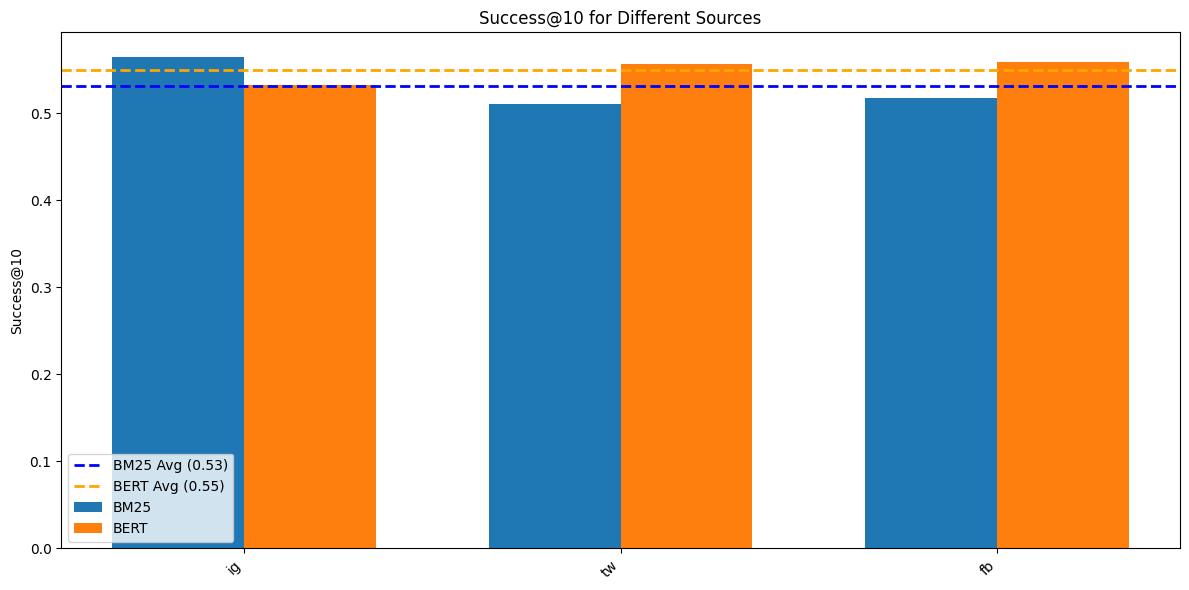

In [8]:
char_counts = pd.read_csv('drive/MyDrive/Sem_Sim_proj/source_cat.csv')
range_list = []
col_list = []
range_dict = dict()
col_list2 = []

for col in char_counts.columns:
    i_range = char_counts[col][0]
    range_list.append(i_range)
    col_list.append(col)

x = ast.literal_eval(i_range)
l = len(range_list)

for i in range(1, l):
    range_list[i] = ast.literal_eval(range_list[i])
    range_dict[col_list[i]] = range_list[i]
    col_list2.append(col_list[i])



score_list_bert = []
success_k_list_bert = []

for col in col_list2:
    i_range = range_dict[col]
    score, success_k = calculate_average_ranking_score(i_range, result_df_bert, true_pairs, 10)
    score_list_bert.append(score)
    success_k_list_bert.append(success_k)

avg_success_bert = np.mean(success_k_list_bert)



score_list_BM = []
success_k_list_BM = []

for col in col_list2:
    i_range = range_dict[col]
    score, success_k = calculate_average_ranking_score(i_range, result_df_BM, true_pairs, 10)
    score_list_BM.append(score)
    success_k_list_BM.append(success_k)


avg_success_BM = np.mean(success_k_list_BM)


plt.figure(figsize=(12, 6))
width = 0.35  # the width of the bars
x = np.arange(len(col_list2))  # the label locations
rects1 = plt.bar(x - width/2, success_k_list_BM, width, label='BM25')
rects2 = plt.bar(x + width/2, success_k_list_bert, width, label='BERT')

plt.axhline(y=avg_success_BM, color='blue', linestyle='--', linewidth=2, label=f'BM25 Avg ({avg_success_BM:.2f})')
plt.axhline(y=avg_success_bert, color='orange', linestyle='--', linewidth=2, label=f'BERT Avg ({avg_success_bert:.2f})')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Success@10')
plt.title('Success@10 for Different Sources')
plt.xticks(x, col_list2, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

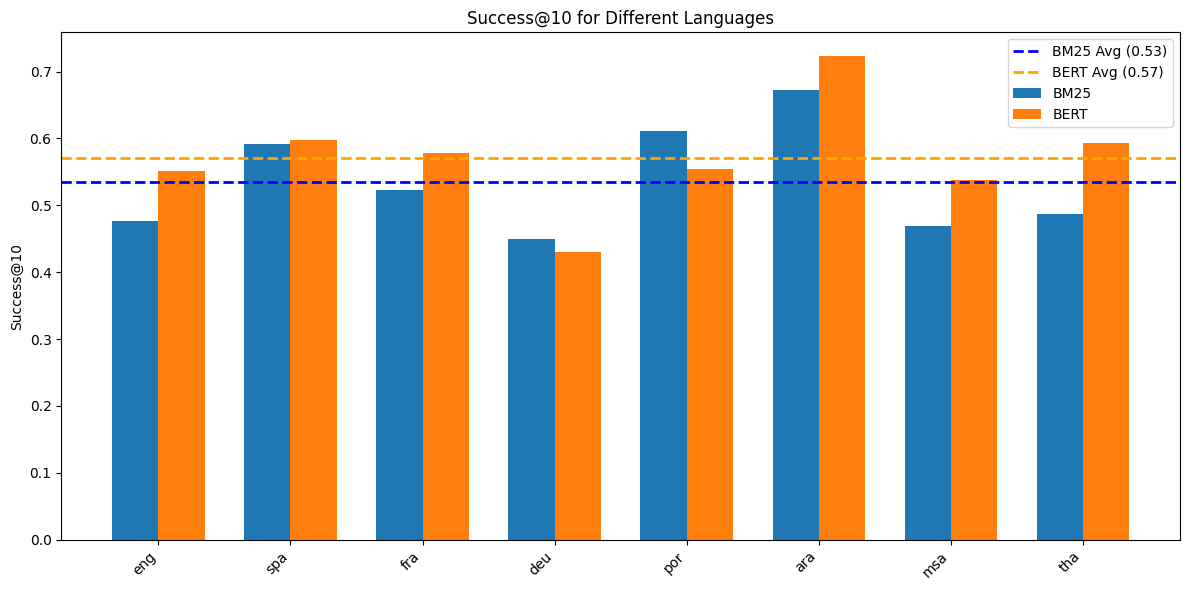

In [9]:
char_counts = pd.read_csv('drive/MyDrive/Sem_Sim_proj/lang_cat.csv')
range_list = []
col_list = []
range_dict = dict()
col_list2 = []

for col in char_counts.columns:
    i_range = char_counts[col][0]
    range_list.append(i_range)
    col_list.append(col)

x = ast.literal_eval(i_range)
l = len(range_list)

for i in range(1, l):
    range_list[i] = ast.literal_eval(range_list[i])
    range_dict[col_list[i]] = range_list[i]
    col_list2.append(col_list[i])



score_list_bert = []
success_k_list_bert = []

for col in col_list2:
    i_range = range_dict[col]
    score, success_k = calculate_average_ranking_score(i_range, result_df_bert, true_pairs, 10)
    score_list_bert.append(score)
    success_k_list_bert.append(success_k)

avg_success_bert = np.mean(success_k_list_bert)


score_list_BM = []
success_k_list_BM = []

for col in col_list2:
    i_range = range_dict[col]
    score, success_k = calculate_average_ranking_score(i_range, result_df_BM, true_pairs, 10)
    score_list_BM.append(score)
    success_k_list_BM.append(success_k)


avg_success_BM = np.mean(success_k_list_BM)


plt.figure(figsize=(12, 6))
width = 0.35  # the width of the bars
x = np.arange(len(col_list2))  # the label locations
rects1 = plt.bar(x - width/2, success_k_list_BM, width, label='BM25')
rects2 = plt.bar(x + width/2, success_k_list_bert, width, label='BERT')


plt.axhline(y=avg_success_BM, color='blue', linestyle='--', linewidth=2, label=f'BM25 Avg ({avg_success_BM:.2f})')
plt.axhline(y=avg_success_bert, color='orange', linestyle='--', linewidth=2, label=f'BERT Avg ({avg_success_bert:.2f})')
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Success@10')
plt.title('Success@10 for Different Languages')
plt.xticks(x, col_list2, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
result_df_BM = pd.read_csv('drive/MyDrive/Sem_Sim_proj/BM25_results.csv')
result_df_bert = pd.read_csv('drive/MyDrive/Sem_Sim_proj/sen_bert_k100.csv')
true_pairs = pd.read_csv('drive/MyDrive/Sem_Sim_proj/pairs.csv')
post = pd.read_csv('drive/MyDrive/Sem_Sim_proj/posts.csv')

all_id = post['post_id'].tolist()

In [7]:
score, success_k = calculate_average_ranking_score(all_id, result_df_bert, true_pairs, 10)
print("Average ranking score:", score)
print("Average success@k:", success_k)

Average ranking score: 4.3473995858477044e-05
Average success@k: 0.5569522328189596


In [11]:
score, success_k = calculate_average_ranking_score(all_id, result_df_bert, true_pairs, 50)
print("Average ranking score:", score)
print("Average success@k:", success_k)

Average ranking score: 4.3999094056656645e-05
Average success@k: 0.6758626335393557


In [8]:
score, success_k = calculate_average_ranking_score(all_id, result_df_bert, true_pairs, 100)
print("Average ranking score:", score)
print("Average success@k:", success_k)

Average ranking score: 4.410698696167044e-05
Average success@k: 0.7140729674047999


In [9]:
score, success_k = calculate_average_ranking_score(all_id, result_df_BM, true_pairs, 10)
print("Average ranking score:", score)
print("Average success@k:", success_k)

Average ranking score: 4.3453044234287246e-05
Average success@k: 0.519382478545018


In [12]:
score, success_k = calculate_average_ranking_score(all_id, result_df_BM, true_pairs, 50)
print("Average ranking score:", score)
print("Average success@k:", success_k)

Average ranking score: 4.384654964927401e-05
Average success@k: 0.6207789284106259


In [10]:
score, success_k = calculate_average_ranking_score(all_id, result_df_BM, true_pairs, 100)
print("Average ranking score:", score)
print("Average success@k:", success_k)

Average ranking score: 4.3946715328012585e-05
Average success@k: 0.6540883849753728
